<a href="https://www.kaggle.com/code/harshelke/zomato-eda-harsh-shelke?scriptVersionId=152358785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
zomato_df=pd.read_csv("/kaggle/input/zomato-eda/zomato.csv")
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato_df.drop(['url','address','phone','rest_type','dish_liked','reviews_list','menu_item','listed_in(city)'],axis=1,inplace=True)
zomato_df.head(3)

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet


In [4]:
zomato_df.isnull().sum().sum()

8187

In [5]:
zomato_df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

In [6]:
zomato_df.dropna(inplace=True)


In [7]:
zomato_df.isnull().sum().sum()

0

In [8]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


In [9]:
zomato_df.rename(columns={'name':'new_name','online_order':'isitonline','book_table':'booking','rate':'rating','votes':'voting','approx_cost(for two people)':'cost','listed_in(type)':'type'},inplace=True)
zomato_df.head()

,new_name,isitonline,booking,rating,voting,location,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


In [10]:
#Cleaning individual rows
zomato_df['rating'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
zomato_df.drop(zomato_df.loc[zomato_df['rating']=='-'].index,inplace=True)
# zomato_df['rating'].unique()


In [12]:
zomato_df.drop(zomato_df.loc[zomato_df['rating']=='NEW'].index,inplace=True)
zomato_df['rating'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:

zomato_df['rating'].isnull().sum()
#Counting null values in the column


0

In [14]:
# import re
l=[]
for i in zomato_df['rating']:
     l.append(i.split('/')[0])
zomato_df['rating']=l
print(zomato_df['rating'])

#  a=re.findall('\d.\d',i)
# zomato_df['rating'].split('/')[0]


0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51709    3.7 
51711    2.5 
51712    3.6 
51715    4.3 
51716    3.4 
Name: rating, Length: 41410, dtype: object


In [15]:
zomato_df

,new_name,isitonline,booking,rating,voting,location,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Finger Food,"2,500",Pubs and bars


In [16]:
zomato_df['rating'].isnull().sum()

0

In [17]:
zomato_df.drop(zomato_df.loc[zomato_df['cuisines']==' ...'].index,inplace=True)

In [18]:
zomato_df.drop(zomato_df.loc[zomato_df['new_name']=='...'].index,inplace=True)

In [19]:
zomato_df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [20]:
zomato_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Marathahalli', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'Domlur', 'Koramangala 8th Block', 'Ejipura',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram',
       'Kammanahalli', 'Koramangala 6th Block', 'Majestic'

In [21]:
zomato_df['location'].isnull().sum()

0

In [22]:
zomato_df['cost']=zomato_df['cost'].str.replace(",",'',regex=True).astype(int)

In [23]:
zomato_df
# l1=[]
# for i in zomato_df['cost']:
#     i=str(i)
#     if ',' in i:
#         i=i.replace(',','')
#         print(int(i))
# #         zomato_df['cost']=i
#     else:
#         print (int(i))
# #           zomato_df['cost']=i
# print(zomato_df['cost'])
    
#     if len

# import re
# money=[]
# for i in zomato_df['cost']:
#      print(i[0:])
    #  a=re.split(',',i)
#    print(i)
#    if ',' in i:
#     i=i.replace(',','')
#    print(i)
    
#  money.append(a)
# zomato_df['cost']=money
# zomato_df['cost']
 
        

,new_name,isitonline,booking,rating,voting,location,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Continental,1500,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Finger Food,2500,Pubs and bars


In [24]:
zomato_df.drop_duplicates(inplace=True)

In [25]:
zomato_df.shape

(29731, 9)

In [26]:
zomato_df

,new_name,isitonline,booking,rating,voting,location,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Continental,1500,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Finger Food,2500,Pubs and bars


In [27]:
zomato_df[zomato_df.duplicated()].count().sum()

0

In [28]:
zomato_df.groupby('new_name').count().head()

,isitonline,booking,rating,voting,location,cuisines,cost,type
new_name,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,2,2,2,2,2,2,2,2


In [29]:
list(zomato_df['new_name'].unique())

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-up-ino',
 "Kirthi's Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'CAFE NOVA',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji's Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "McDonald's",
 "Domino's Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point'

In [30]:
zomato_df['new_name']=zomato_df['new_name'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [31]:
zomato_df.groupby('new_name').count().head()

,isitonline,booking,rating,voting,location,cuisines,cost,type
new_name,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4
#refuel,3,3,3,3,3,3,3,3
1000 B.C,2,2,2,2,2,2,2,2
100C,2,2,2,2,2,2,2,2


In [32]:
zomato_df

,new_name,isitonline,booking,rating,voting,location,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Continental,1500,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Finger Food,2500,Pubs and bars


In [33]:
zomato_df['rating'].isnull().sum().sum()

0

In [34]:
zomato_df['voting'].isnull().sum().sum()

0

In [35]:
zomato_df['location'].isnull().sum().sum()

0

In [36]:
zomato_df['cuisines'].isnull().sum().sum()

0

In [37]:
zomato_df['cost'].isnull().sum().sum()

0

In [38]:
zomato_df['type'].isnull().sum().sum()

0

,count
new_name,
Onesta,81
Cafe Coffee Day,80
Empire Restaurant,66
Kanti Sweets,60
Just Bake,55
KFC,54
Five Star Chicken,54
Pizza Hut,53
Smally's Resto Cafe,53


Text(0.5, 1.0, 'Restaurant count')

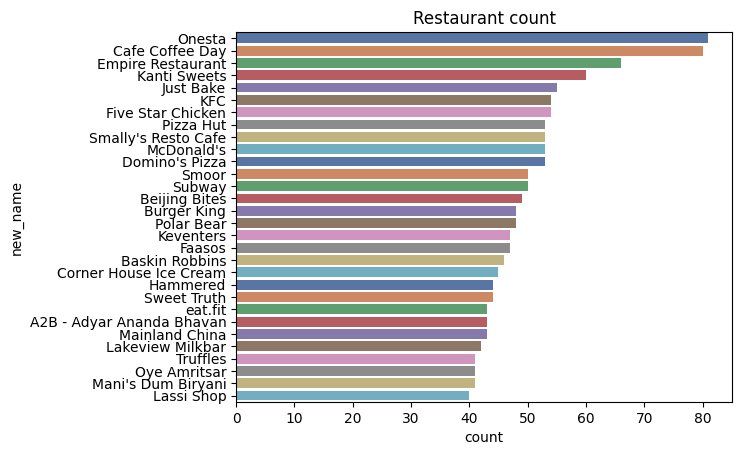

In [39]:
import seaborn as sns
df=zomato_df['new_name'].value_counts().head(30)
display(df.to_frame())
sns.barplot(x=df,y=df.index,palette='deep')
plt.title('Restaurant count')

In [40]:
zomato_df

,new_name,isitonline,booking,rating,voting,location,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Continental,1500,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Finger Food,2500,Pubs and bars


Text(0.5, 1.0, 'Online delivery count')

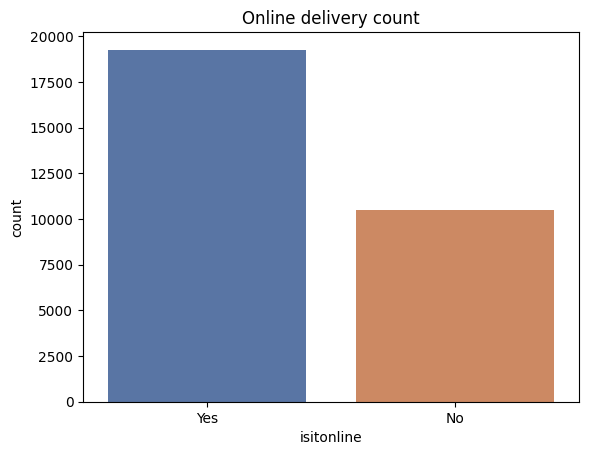

In [41]:
# rest=zomato_df['new_name'].head(3)
sns.countplot(x='isitonline',data=zomato_df,palette='deep')
plt.title('Online delivery count')

In [42]:
zomato_df['rating']=zomato_df['rating'].astype('float')

Text(0.5, 1.0, 'Booking v/s Rating')

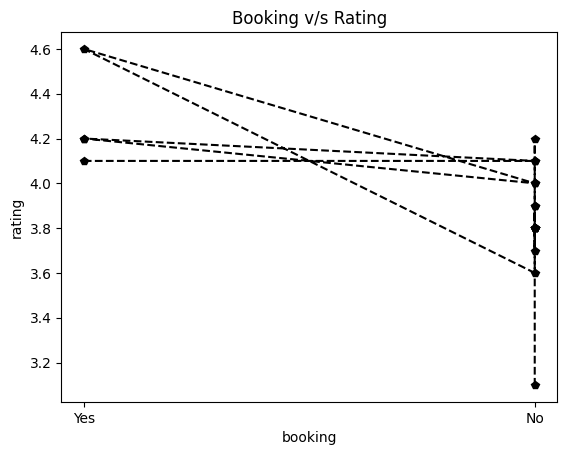

In [43]:
x=zomato_df['booking'].head(20)
y=zomato_df['rating'].head(20)
plt.plot(x,y, 'kp--')
plt.xlabel('booking')
plt.ylabel('rating')
plt.title('Booking v/s Rating')

Text(0.5, 1.0, 'BOOKING V/S RATING')

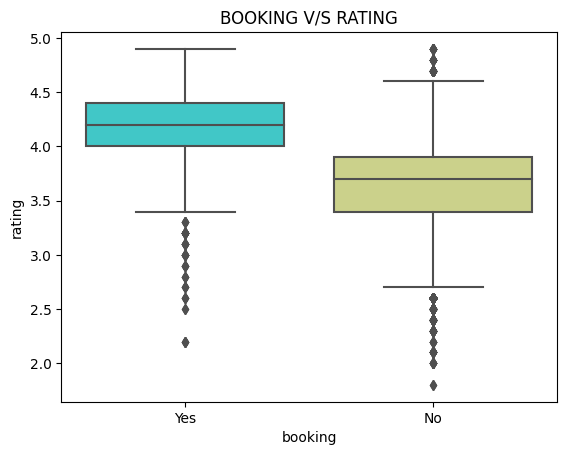

In [44]:
# t1=zomato_df['booking'].head(20)
# t2=zomato_df['rating'].head(20)
sns.boxplot(x='booking', y='rating',data=zomato_df, palette='rainbow')
plt.title('BOOKING V/S RATING')

Text(0.5, 1.0, 'BOOKING V/S RATING')

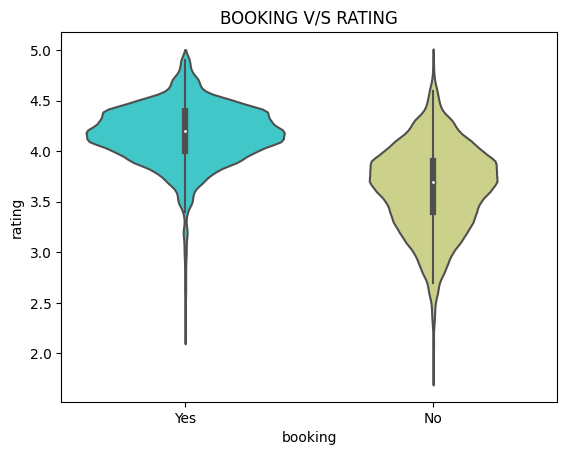

In [45]:
sns.violinplot(x='booking', y='rating',data=zomato_df, palette='rainbow')
plt.title('BOOKING V/S RATING')

,count
location,
BTM,2116
Indiranagar,1585
Koramangala 5th Block,1554
Whitefield,1542
HSR,1486
Marathahalli,1385
JP Nagar,1158
Jayanagar,1121
Bellandur,966


Text(0.5, 1.0, 'BEST LOCATION')

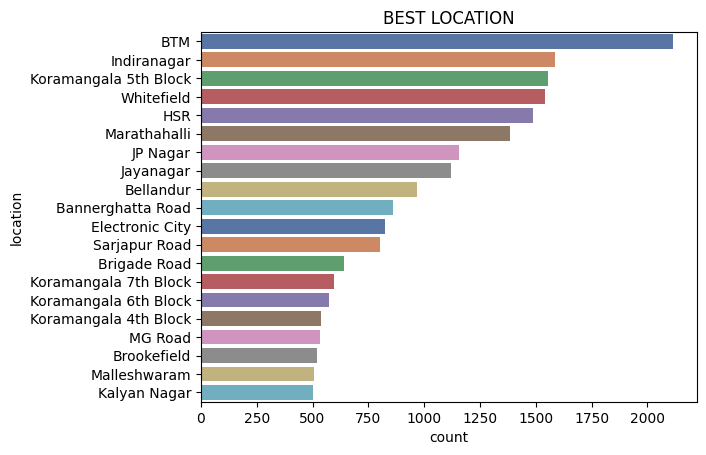

In [46]:
df1=zomato_df['location'].value_counts().head(20)
display(df1.to_frame())
sns.barplot(x=df1,y=df1.index,palette='deep')
plt.title('BEST LOCATION')

Text(0.5, 1.0, 'LOCATION V/S RATING')

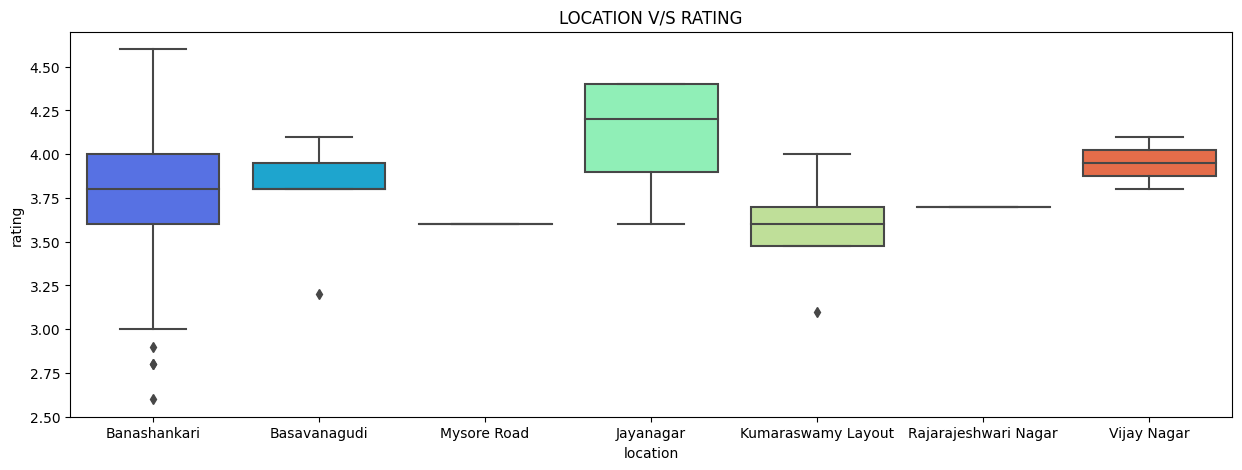

In [47]:
# df2=zomato_df['location'].value_counts().head(10)
# display(df2.to_frame())
df2=zomato_df['location'].head(100)
plt.figure(figsize=(15,5))
sns.boxplot(x=df2, y='rating', data=zomato_df, palette='rainbow')
plt.title('LOCATION V/S RATING')


Text(0.5, 1.0, 'LOCATION V/S RATING')

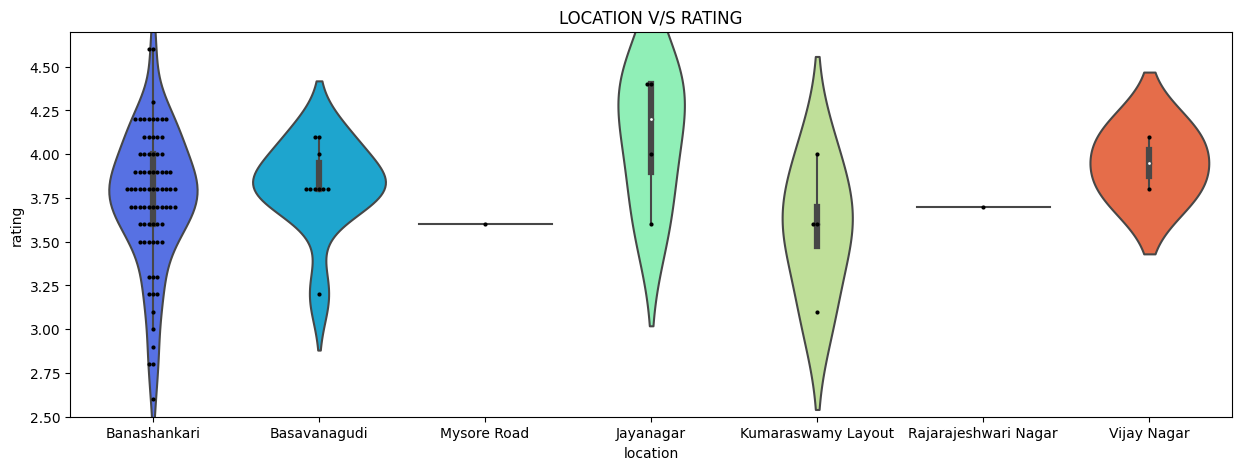

In [48]:
df3=zomato_df['location'].head(100)
plt.figure(figsize=(15,5))
sns.violinplot(x=df3, y='rating', data=zomato_df, palette='rainbow')
sns.swarmplot(x=df3, y='rating',data=zomato_df,color='black',size=3)

plt.title('LOCATION V/S RATING')

,count
type,
Delivery,13549
Dine-out,10912
Desserts,2034
Cafes,1136
Drinks & nightlife,877
Buffet,655
Pubs and bars,568


Text(0.5, 1.0, 'No of Restaurant type')

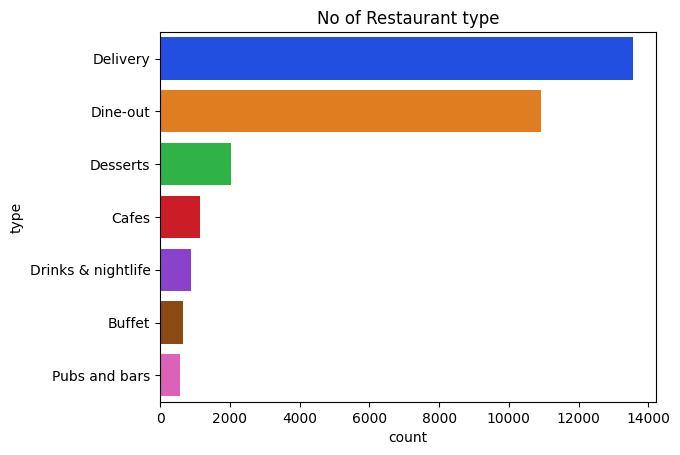

In [49]:
dftype=zomato_df['type'].value_counts()
display(dftype.to_frame())
sns.barplot(x=dftype,y=dftype.index,palette='bright')
plt.title('No of Restaurant type')

Text(0.5, 1.0, 'RESTAURANT TYPE VS RATING(CHECKING IF IT IS ONLINE OR NOT)')

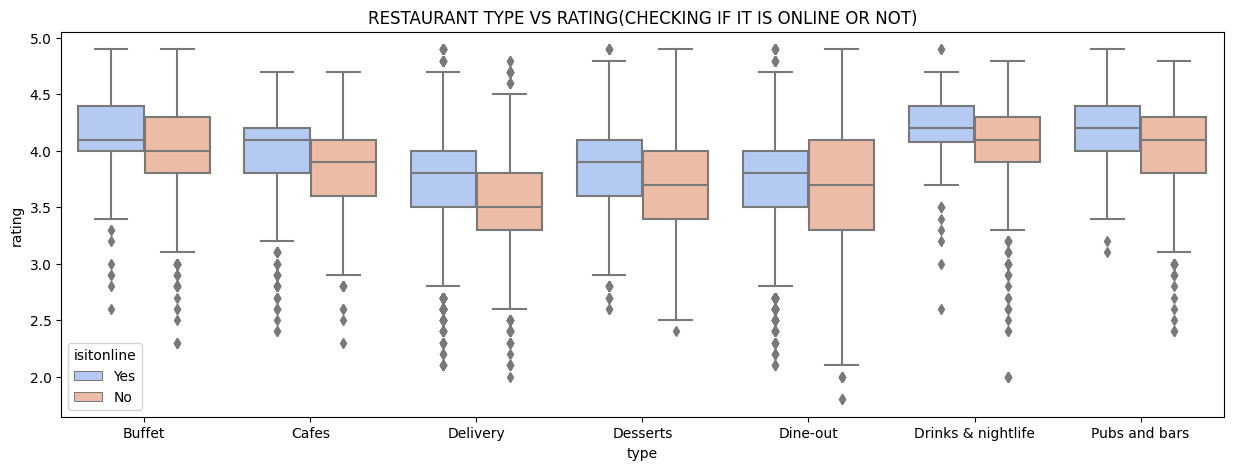

In [50]:
# dftype=zomato_df['type'].value_counts()
# display(dftype.to_frame())
plt.figure(figsize=(15,5))
sns.boxplot(x='type', y="rating", hue="isitonline", data=zomato_df, palette="coolwarm")
plt.title('RESTAURANT TYPE VS RATING(CHECKING IF IT IS ONLINE OR NOT)')


<Axes: ylabel='Density'>

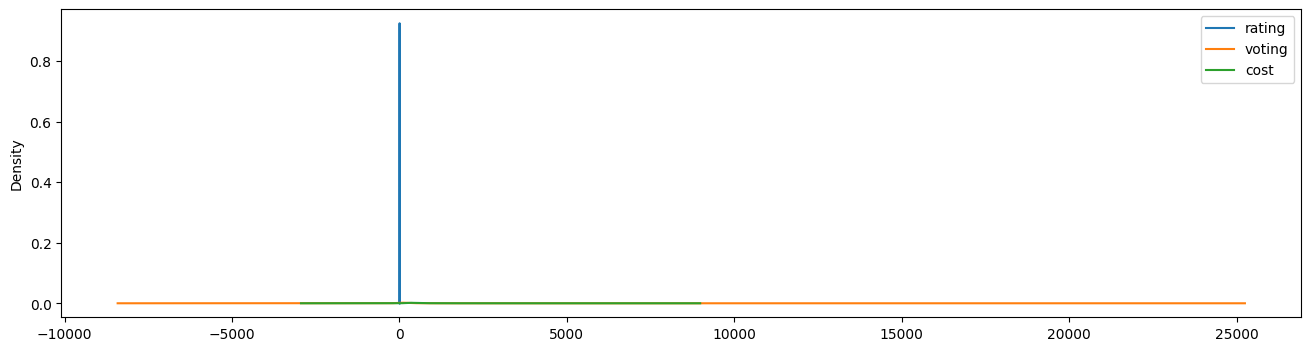

In [51]:
#doubt GAUSIAN REST TYPE AND RATING
zomato_df.plot(kind='kde', figsize=(16,4))

location
BTM                  7667.8
Banashankari         1719.6
Banaswadi            1165.0
Bannerghatta Road    3042.0
Basavanagudi         1479.5
Name: rating, dtype: float64

Text(0.5, 1.0, 'BEST LOCATION BASED ON RATING')

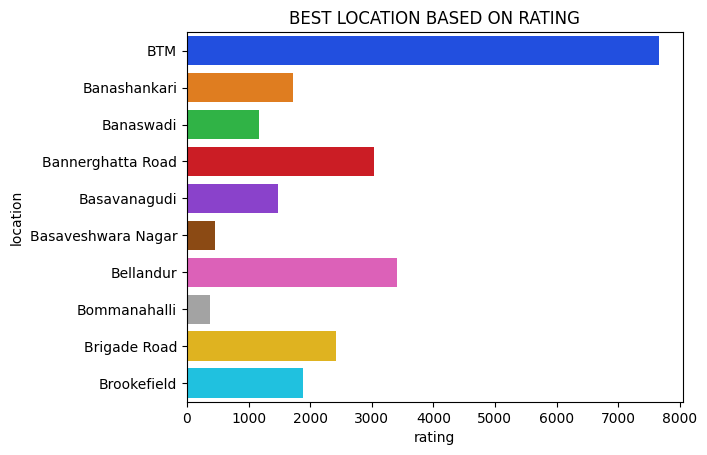

In [52]:
bestloc=zomato_df.loc[:,['location','rating']]
bestloc=zomato_df.groupby('location')['rating'].sum()
# display(bestloc.to_frame())
# bestloc
bestloc.sort_values(ascending=False)
display(bestloc.head())

sns.barplot(x=bestloc[:10],y=bestloc.index[:10],palette='bright')
plt.title('BEST LOCATION BASED ON RATING')
# bestloc

location
BTM                  405378
Banashankari         107472
Banaswadi             25560
Bannerghatta Road    179492
Basavanagudi          65852
Name: voting, dtype: int64

Text(0.5, 1.0, 'BEST LOCATION BASED ON VOTING')

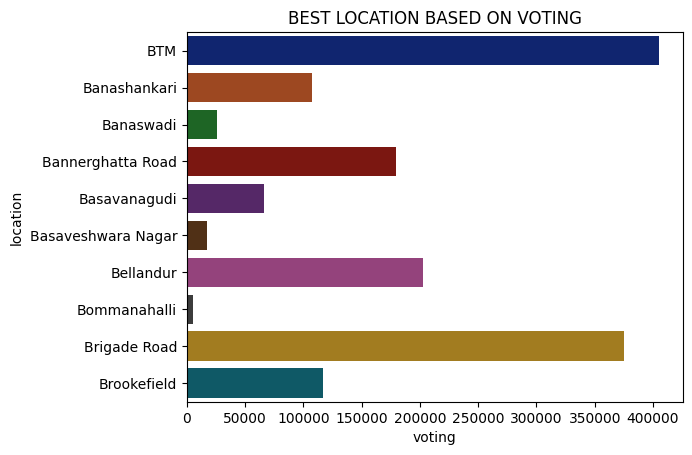

In [53]:
bestlocvotes=zomato_df.loc[:,['location','voting']]
bestlocvotes=zomato_df.groupby('location')['voting'].sum()
# display(bestloc.to_frame())
# bestloc
bestlocvotes.sort_values(ascending=False)
display(bestlocvotes.head())

sns.barplot(x=bestlocvotes[:10],y=bestlocvotes.index[:10],palette='dark')
plt.title('BEST LOCATION BASED ON VOTING')
# bestloc

location
BTM                  432.934783
Banashankari         454.690832
Banaswadi            446.996997
Bannerghatta Road    495.750873
Basavanagudi         367.493797
Name: cost, dtype: float64

Text(0.5, 1.0, 'BEST LOCATION BASED ON COST')

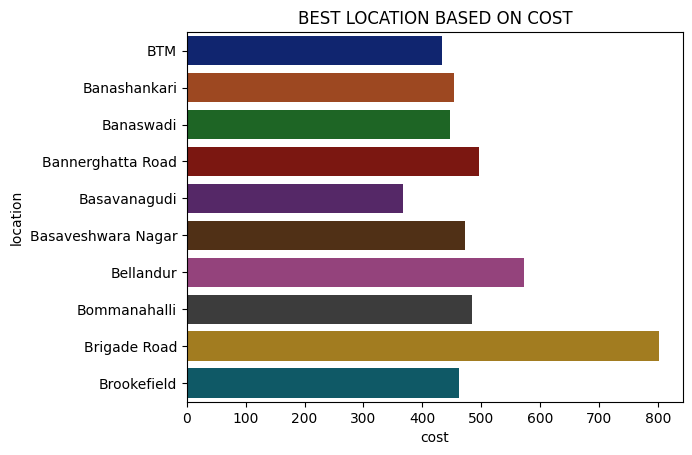

In [54]:
bestloccost=zomato_df.loc[:,['location','cost']]
bestloccost=zomato_df.groupby('location')['cost'].mean()
# display(bestloc.to_frame())
# bestloc
bestloccost.sort_values(ascending=True)
display(bestloccost.head())

sns.barplot(x=bestloccost[:10],y=bestloccost.index[:10],palette='dark')
plt.title('BEST LOCATION BASED ON COST')
# bestloc

In [55]:
resttype=zomato_df['type'].value_counts()
resttype

type
Delivery              13549
Dine-out              10912
Desserts               2034
Cafes                  1136
Drinks & nightlife      877
Buffet                  655
Pubs and bars           568
Name: count, dtype: int64

In [56]:
zomato_df

,new_name,isitonline,booking,rating,voting,location,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Continental,1500,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Finger Food,2500,Pubs and bars


Text(0.5, 1.0, 'RESTAURANT TYPE VS VOTING(CHECKING IF IT IS ONLINE OR NOT)')

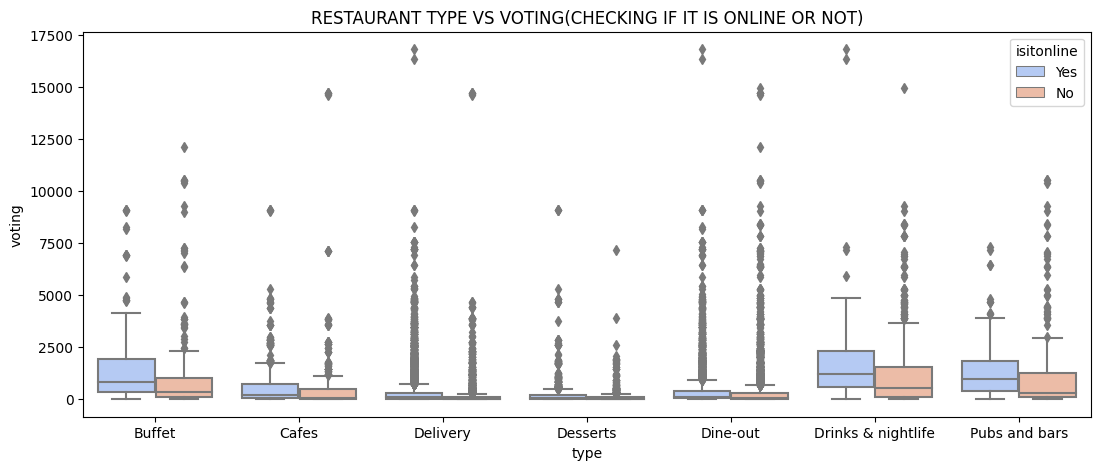

In [57]:
plt.figure(figsize=(13,5))
sns.boxplot(x='type', y="voting", hue="isitonline", data=zomato_df, palette="coolwarm")
plt.title('RESTAURANT TYPE VS VOTING(CHECKING IF IT IS ONLINE OR NOT)')

In [58]:
zomato_df.groupby('type')['voting'].mean().sort_values(ascending = False)[:6]

type
Drinks & nightlife    1361.911060
Buffet                1201.058015
Pubs and bars         1194.285211
Cafes                  640.305458
Dine-out               417.664589
Delivery               311.209979
Name: voting, dtype: float64

In [59]:
zomato_df.groupby('location')['cost'].mean().sort_values(ascending = False)[:6]

location
Sankey Road         2522.500000
Lavelle Road        1432.763158
Race Course Road    1380.434783
MG Road             1293.151970
Infantry Road       1259.876543
Residency Road      1067.777778
Name: cost, dtype: float64

Text(0.5, 1.0, 'RESTAURANT TYPE VS COST')

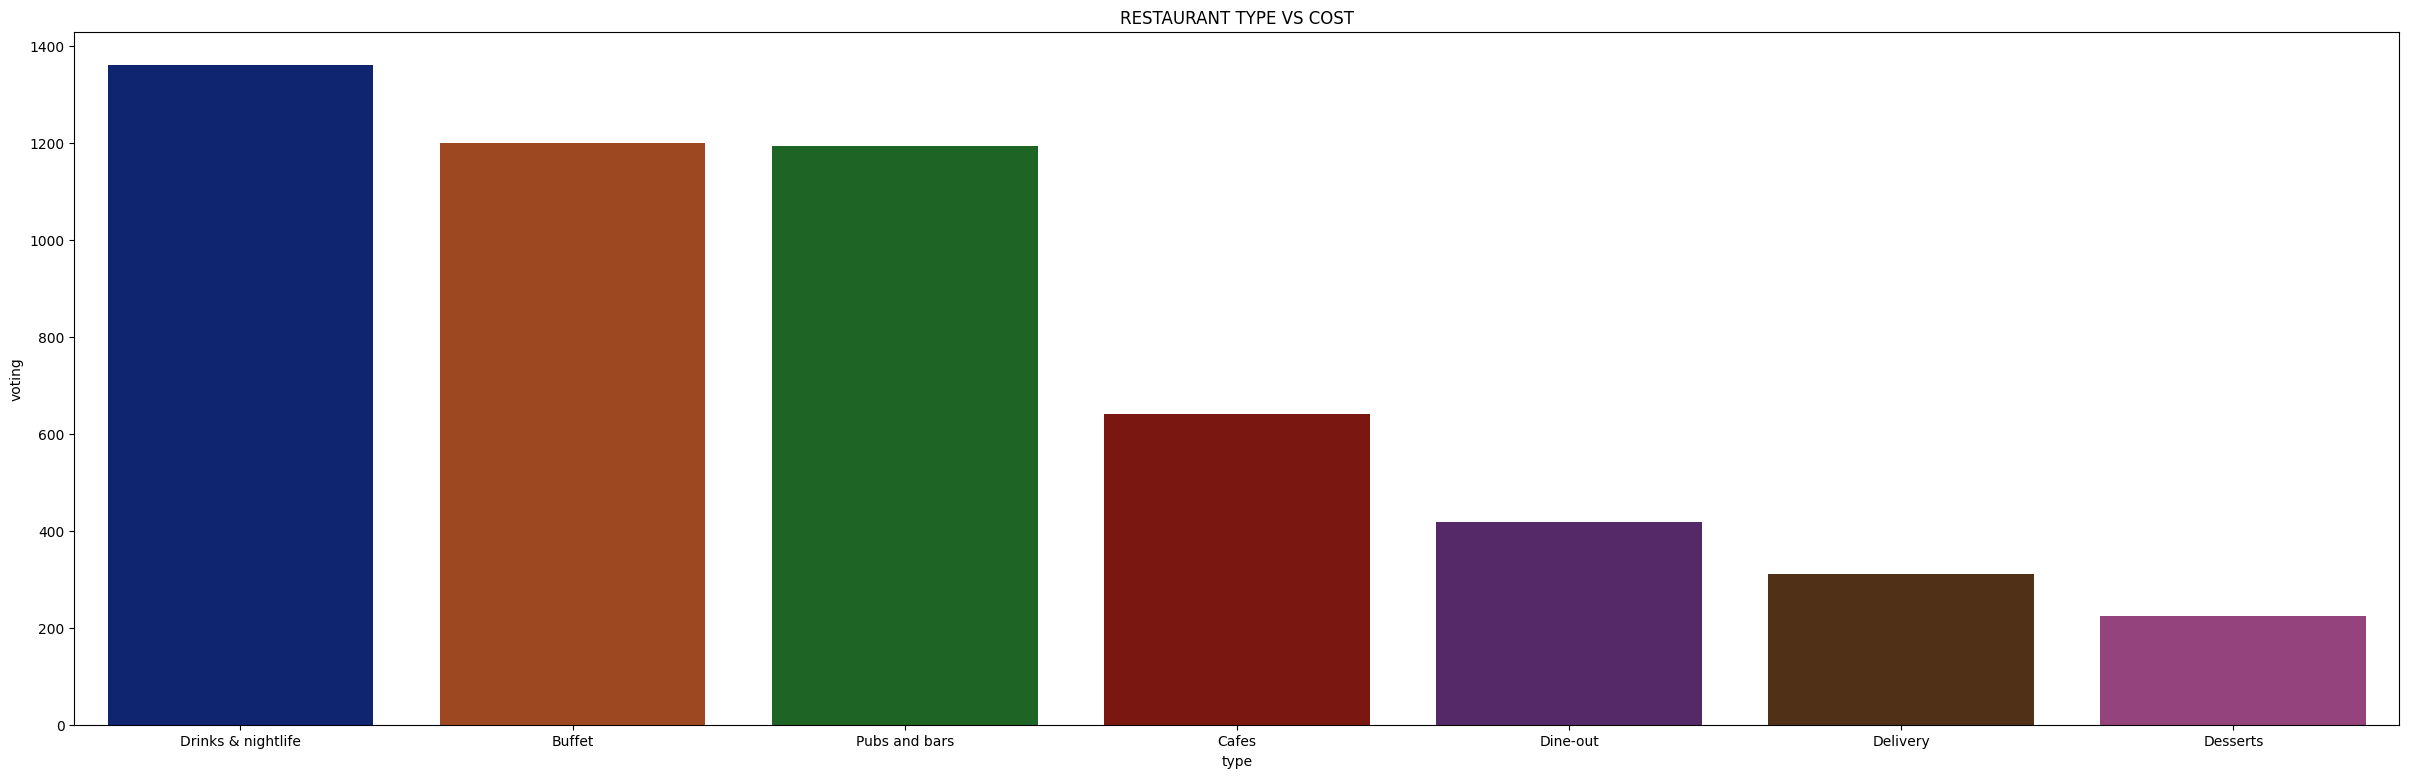

In [60]:
typevscost=zomato_df.groupby('type')['voting'].mean().sort_values(ascending = False)[:10]

plt.figure(figsize=(30,9))
sns.barplot(x=typevscost.index, y=typevscost, palette="dark")
plt.title('RESTAURANT TYPE VS COST')

Text(0.5, 1.0, 'RESTAURANT TYPE VS COST')

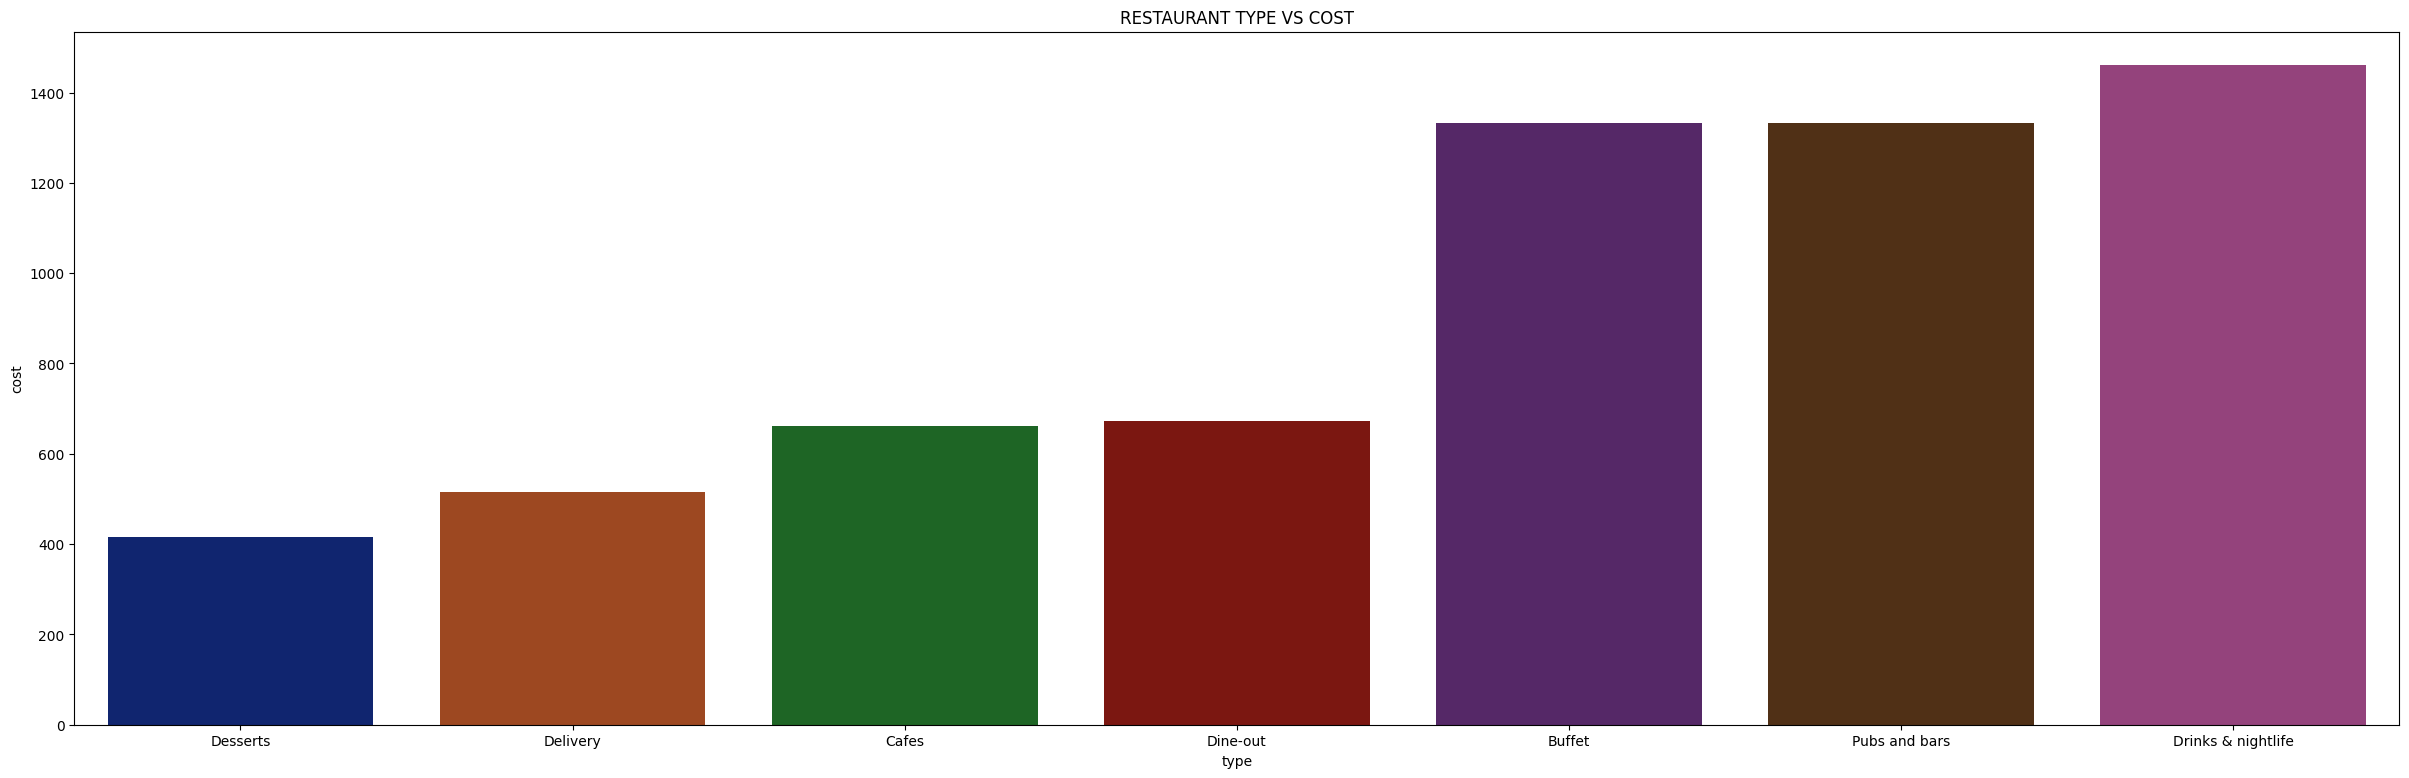

In [61]:
typevscost=zomato_df.groupby('type')['cost'].mean().sort_values(ascending = True)[:10]

plt.figure(figsize=(30,9))
sns.barplot(x=typevscost.index, y=typevscost, palette="dark")
plt.title('RESTAURANT TYPE VS COST')

new_name
Srinidhi Sagar Deluxe        40.0
Nellore Dosa Camp            70.0
Dosa Cafe                    80.0
Nandi Bidadi Thatte Idli    100.0
AM WOW                      100.0
Name: cost, dtype: float64

Text(0.5, 1.0, 'Cost of Restaurant')

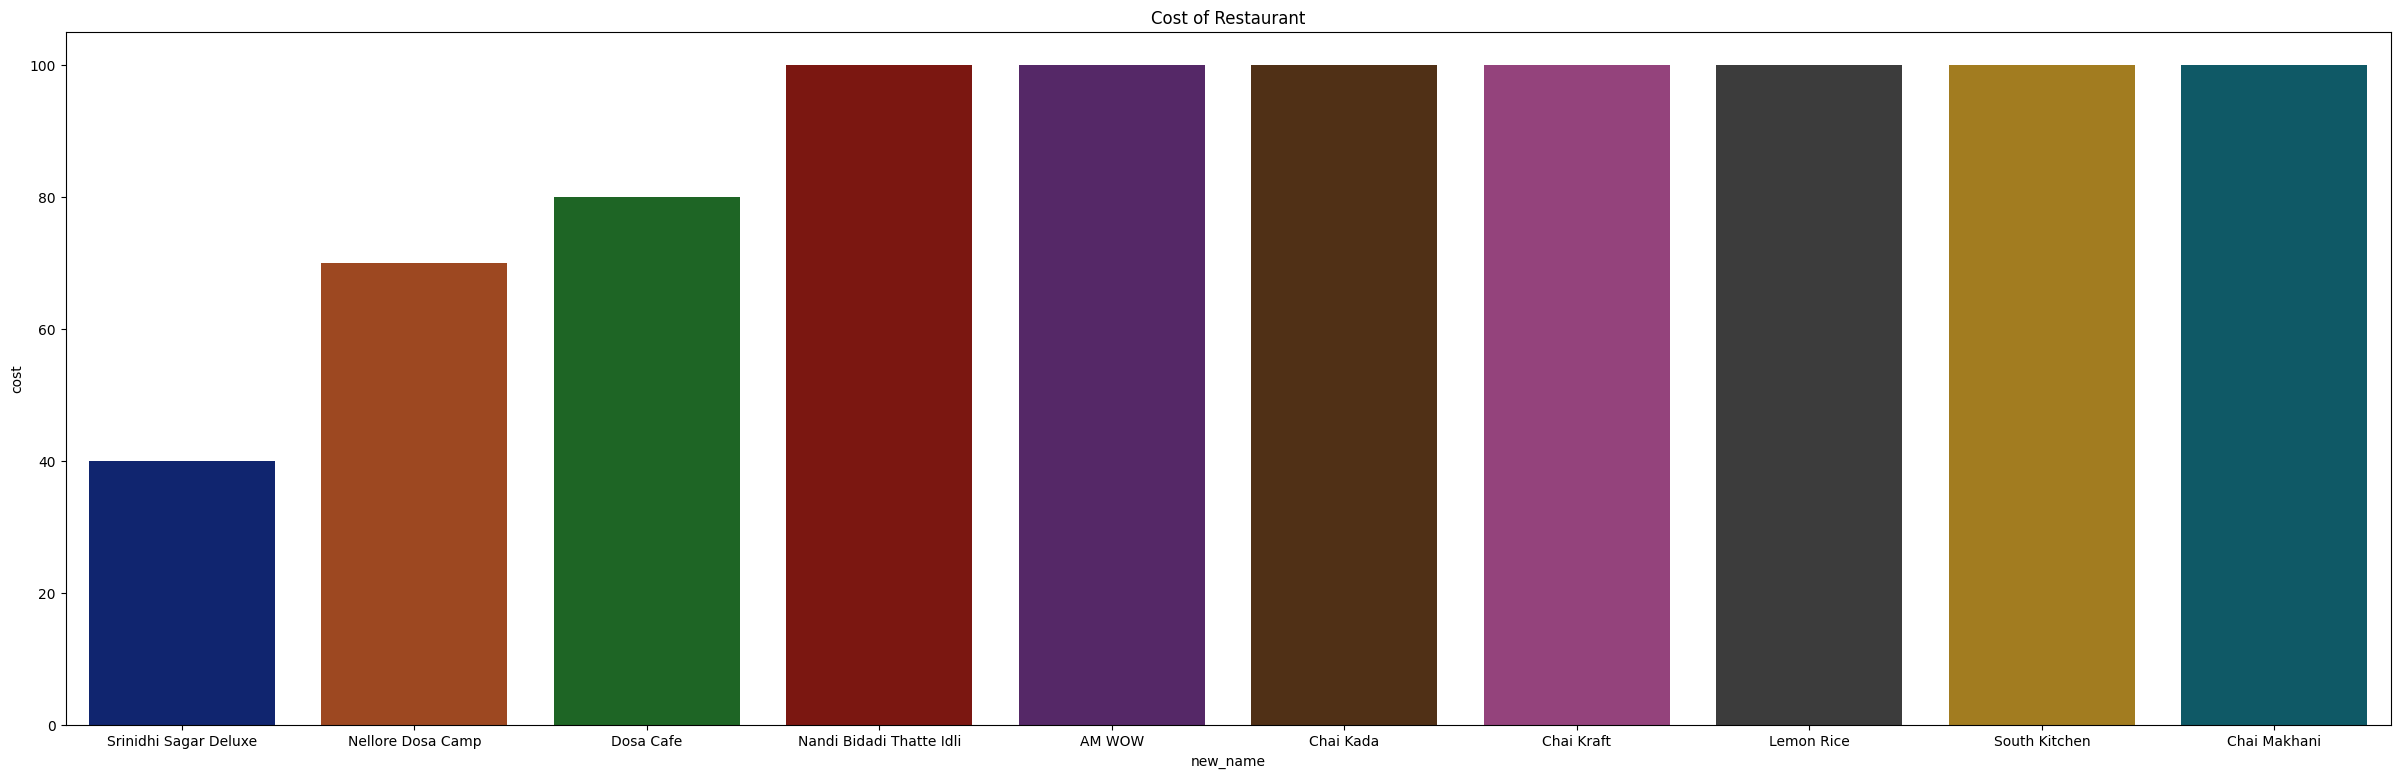

In [62]:
restcost=zomato_df.groupby('new_name')['cost'].mean().sort_values(ascending = True)[:10]
display(restcost.head())
plt.figure(figsize=(30,9))
sns.barplot(x=restcost.index, y=restcost, palette="dark")
plt.title('Cost of Restaurant')

new_name
Le Cirque Signature - The Leela Palace    6000.0
Royal Afghan - ITC Windsor                5000.0
Malties - Radisson Blu                    4500.0
La Brasserie - Le Meridien                4100.0
Dakshin - ITC Windsor                     4000.0
Name: cost, dtype: float64

Text(0.5, 1.0, 'Vote of Restaurant')

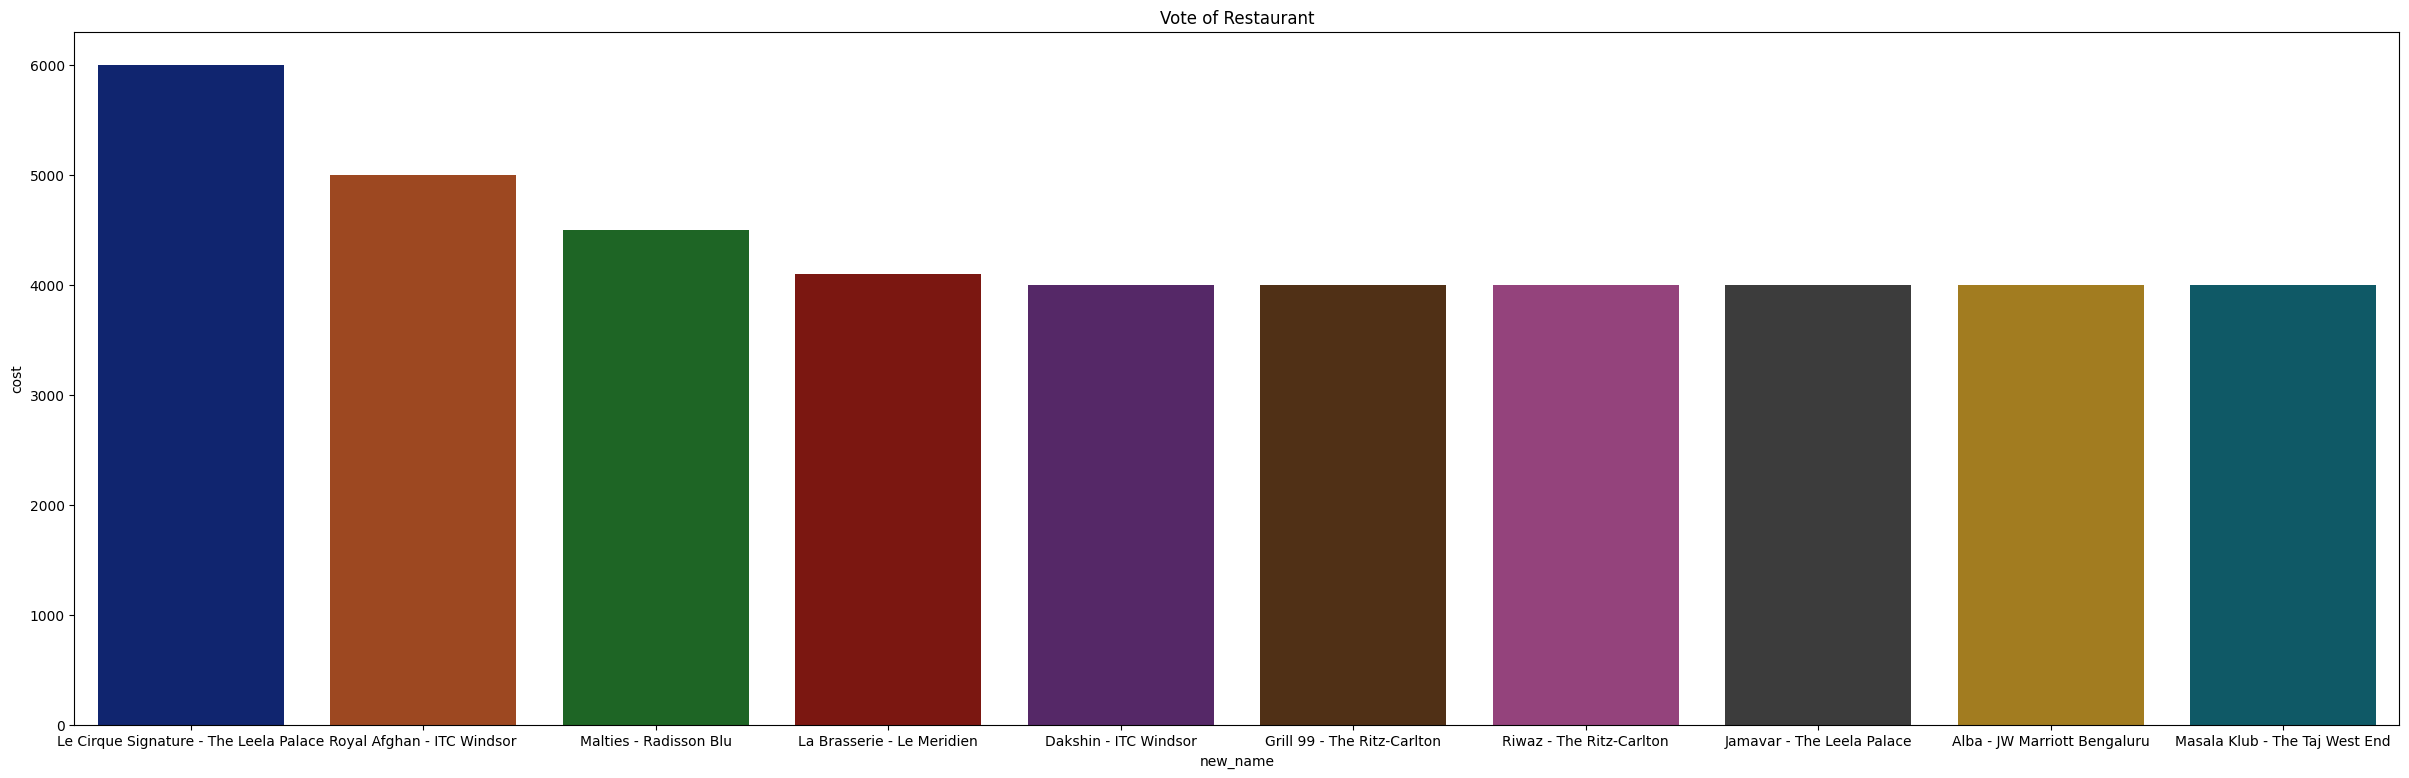

In [63]:
restcost=zomato_df.groupby('new_name')['cost'].mean().sort_values(ascending = False)[:10]
display(restcost.head())
plt.figure(figsize=(30,9))
sns.barplot(x=restcost.index, y=restcost, palette="dark")
plt.title('Vote of Restaurant')

location
BTM                      2116
Indiranagar              1585
Koramangala 5th Block    1554
Whitefield               1542
HSR                      1486
Name: new_name, dtype: int64

Text(0.5, 1.0, 'No of Restaurant based on location')

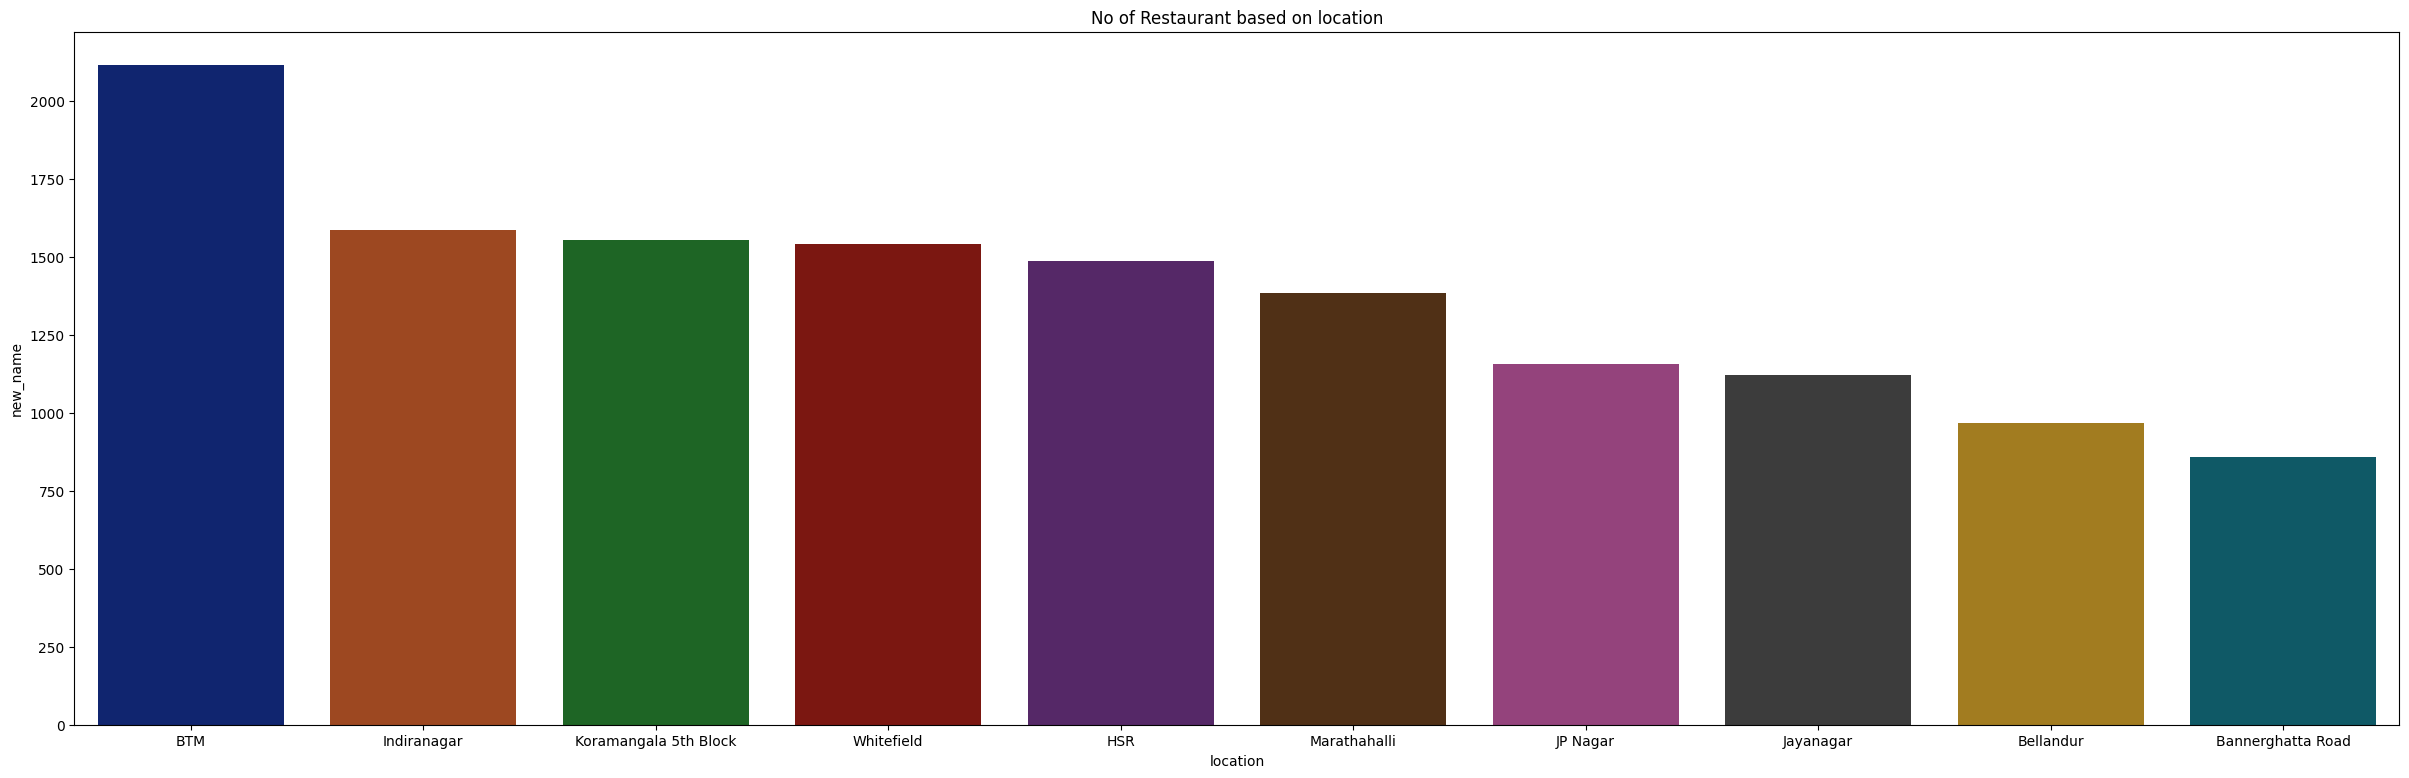

In [64]:
restloc=zomato_df.groupby('location')['new_name'].count().sort_values(ascending = False)[:10]
display(restloc.head())
plt.figure(figsize=(30,9))
sns.barplot(x=restloc.index, y=restloc, palette="dark")
plt.title('No of Restaurant based on location')
# plt.figure(figsize=(30,9))
# sns.barplot(x='location', y=restloc,data=zomato_df, palette="dark")
# plt.title('No of Restaurants based on location')

type
Delivery              13549
Dine-out              10912
Desserts               2034
Cafes                  1136
Drinks & nightlife      877
Name: new_name, dtype: int64

Text(0.5, 1.0, 'No of Restaurant based on type ')

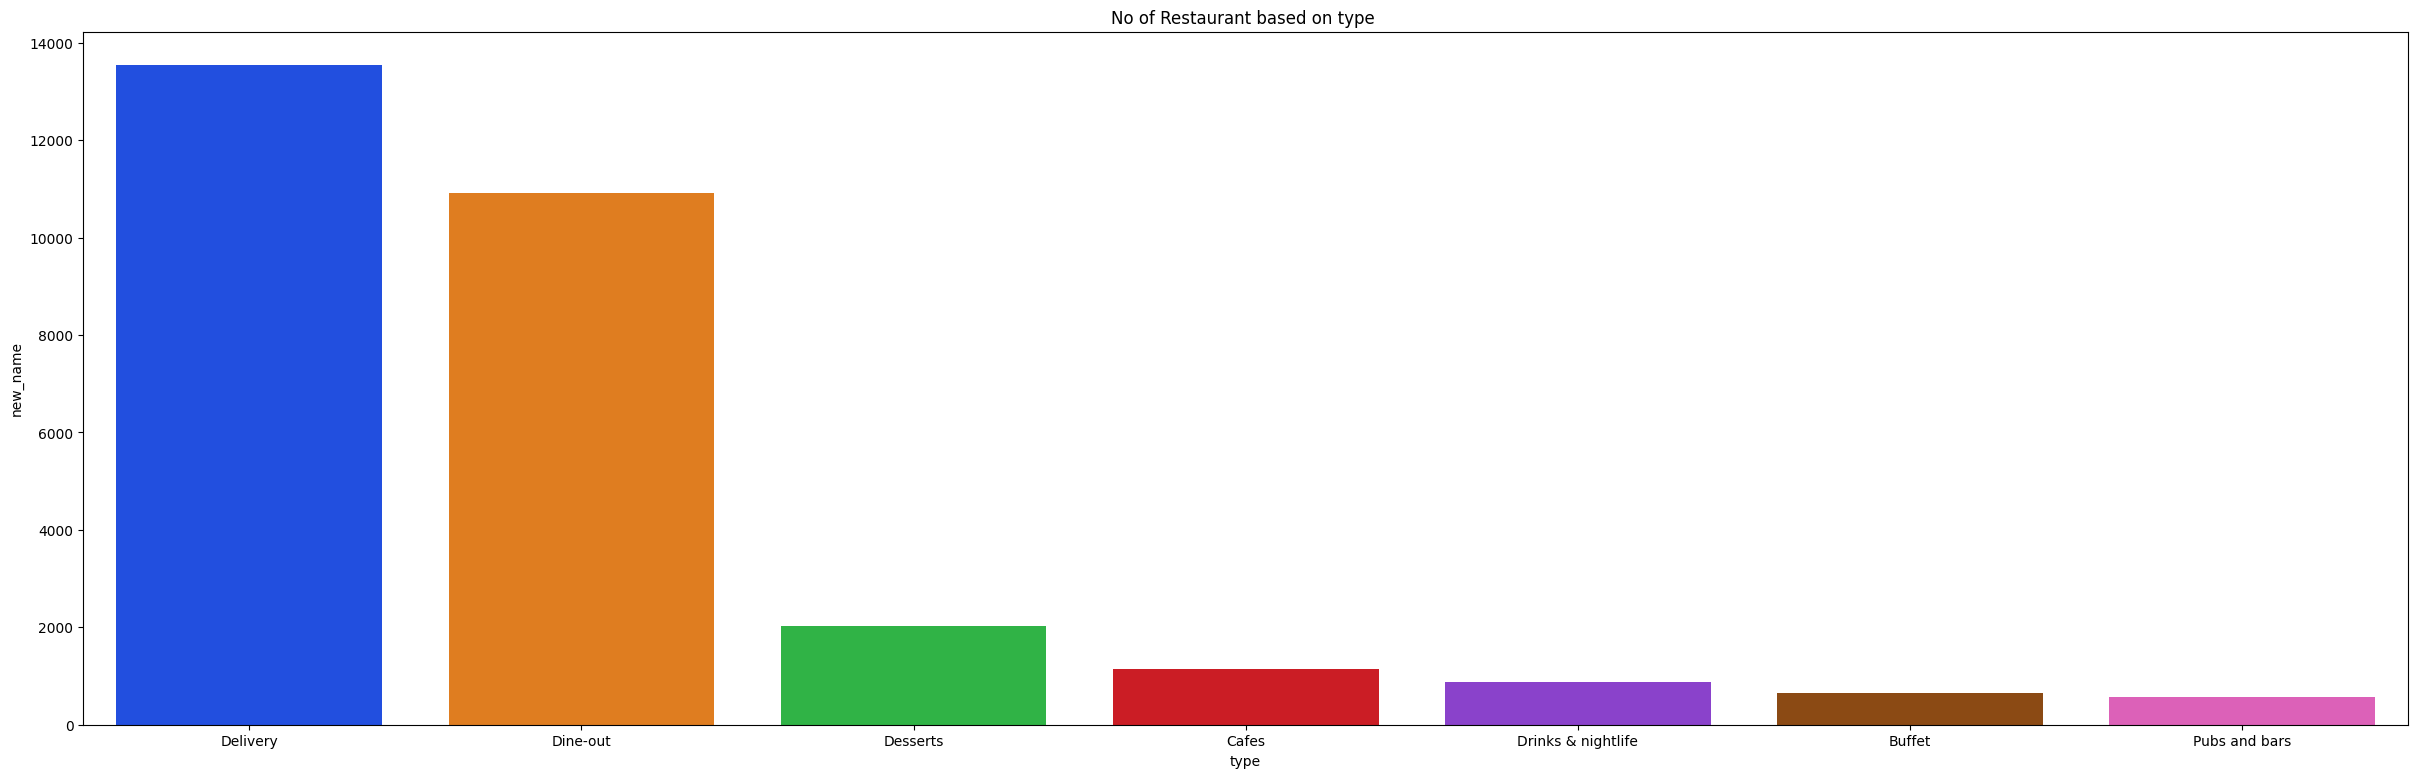

In [65]:
resttype=zomato_df.groupby('type')['new_name'].count().sort_values(ascending = False)[:10]
display(resttype.head())
plt.figure(figsize=(30,9))
sns.barplot(x=resttype.index, y=resttype, palette="bright")
plt.title('No of Restaurant based on type ')

new_name
Asia Kitchen By Mainland China    4.900000
SantSpa Cuisine                   4.900000
Byg Brewski Brewing Company       4.900000
Punjab Grill                      4.871429
Belgian Waffle Factory            4.852381
Name: rating, dtype: float64

Text(0.5, 1.0, 'FAMOUS RESTOS IN BANGALORE(RATING)')

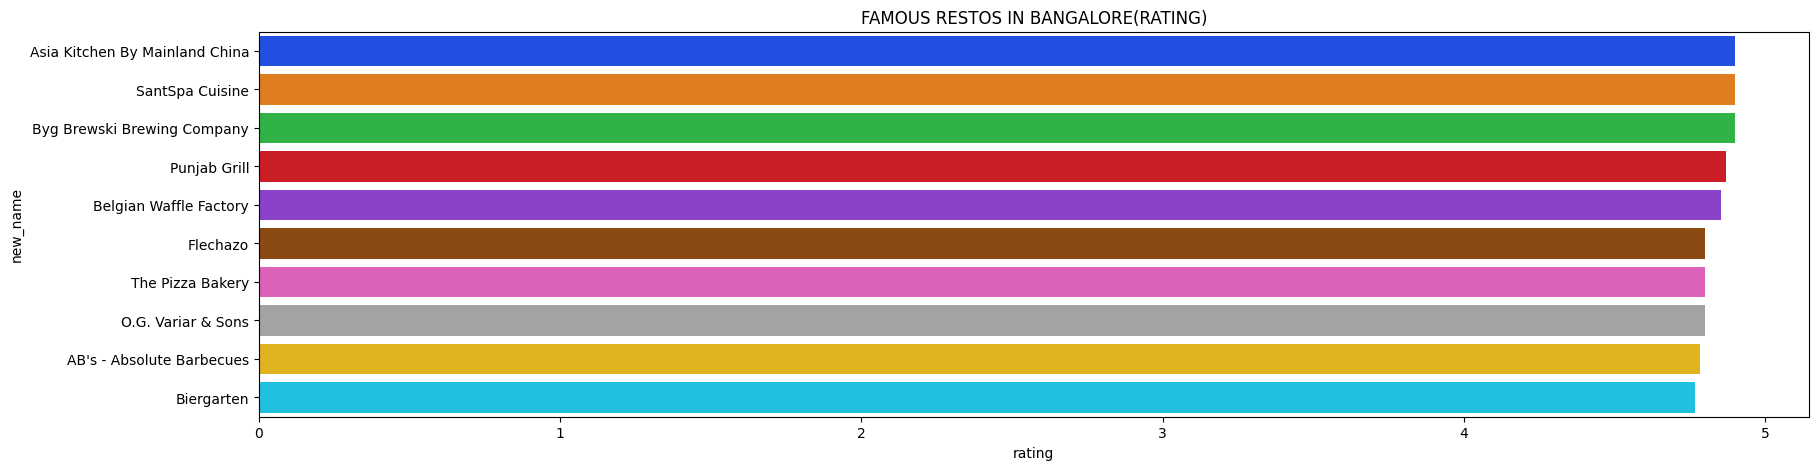

In [66]:
#Most famous resto names in Bangalore using rating
famous=zomato_df.groupby('new_name')['rating'].mean().sort_values(ascending = False)[:10]
display(famous.head())
plt.figure(figsize=(20,5))
sns.barplot(x=famous, y=famous.index, palette="bright")
plt.title('FAMOUS RESTOS IN BANGALORE(RATING)')


new_name
Byg Brewski Brewing Company    16588.500000
Toit                           14956.000000
The Black Pearl                 9562.333333
Big Pitcher                     9164.500000
Arbor Brewing Company           8396.545455
Name: voting, dtype: float64

Text(0.5, 1.0, 'FAMOUS RESTOS IN BANGALORE(VOTING)')

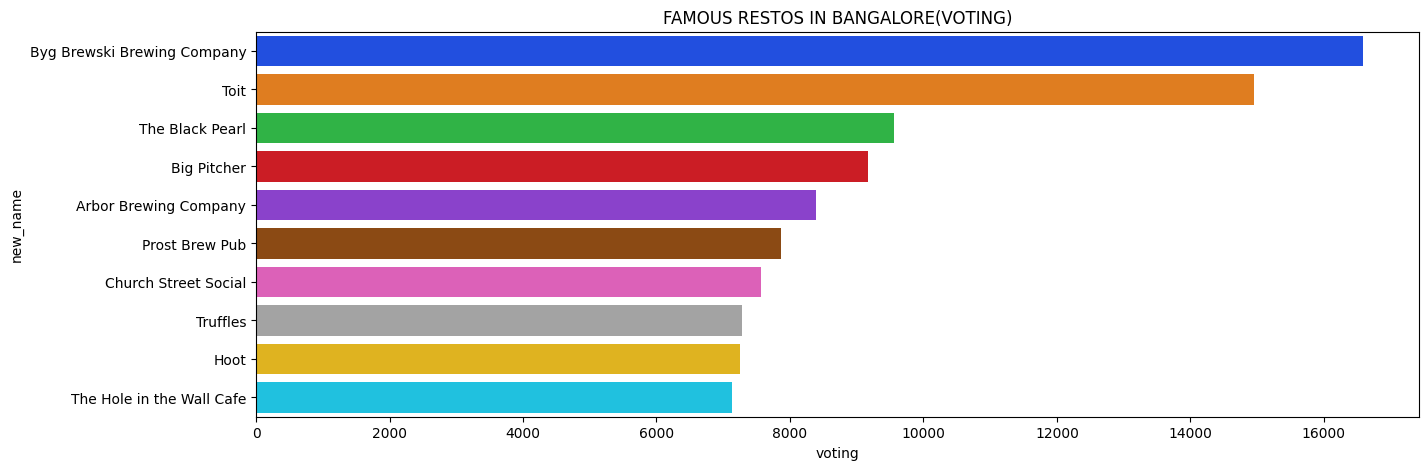

In [67]:
famous=zomato_df.groupby('new_name')['voting'].mean().sort_values(ascending = False)[:10]
display(famous.head())
plt.figure(figsize=(15,5))
sns.barplot(x=famous, y=famous.index, palette="bright")
plt.title('FAMOUS RESTOS IN BANGALORE(VOTING)')

Text(0.5, 1.0, 'FAMOUS RESTOS IN BANGALORE(COUNT)')

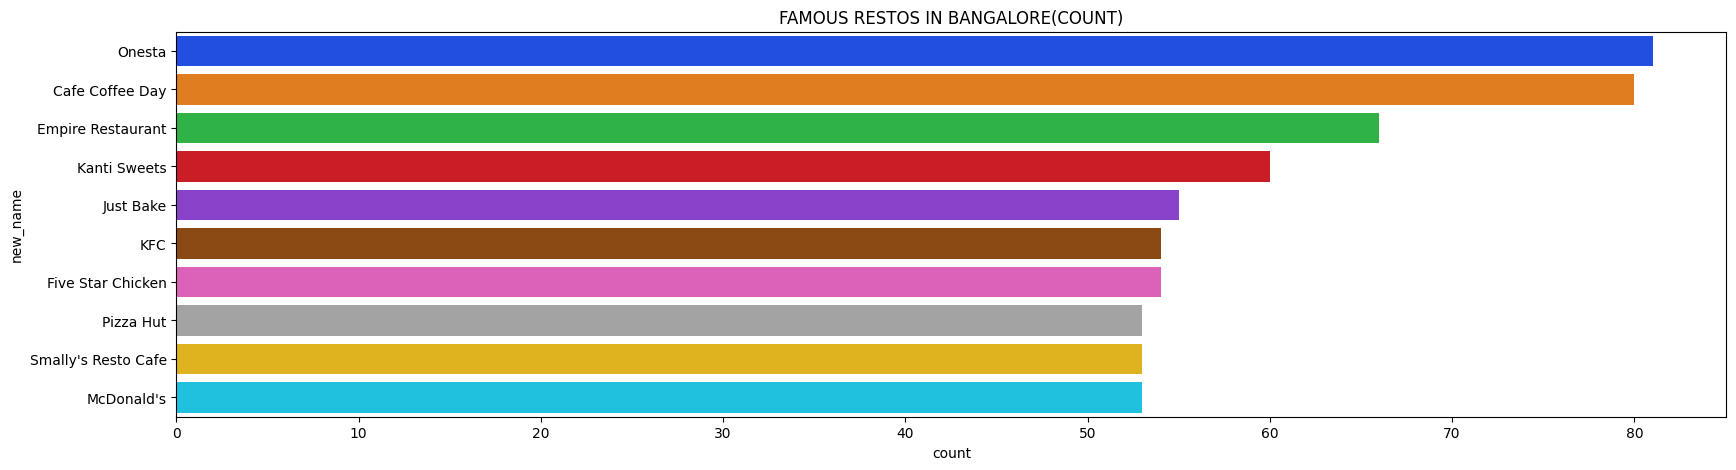

In [68]:
famous=zomato_df['new_name'].value_counts().head(10)


plt.figure(figsize=(20,5))
sns.barplot(x=famous, y=famous.index, palette="bright")
plt.title('FAMOUS RESTOS IN BANGALORE(COUNT)')


Text(0.5, 1.0, 'Gaussian Rest type and Rating')

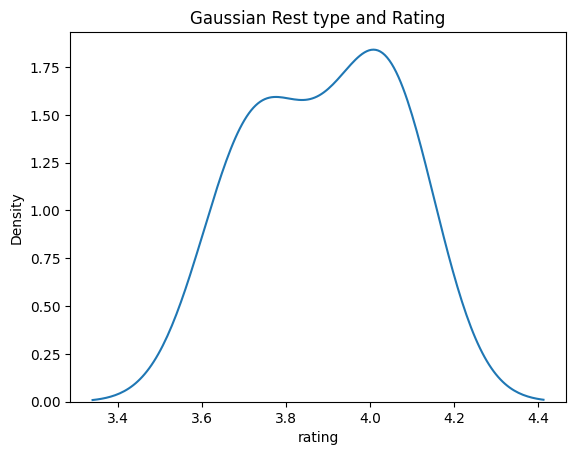

In [69]:
gauss=zomato_df.groupby('type')['rating'].mean().sort_values(ascending = False)[:10]
gauss
sns.kdeplot(gauss)
plt.title('Gaussian Rest type and Rating')

Text(0.5, 1.0, 'Gaussian Rest type and Voting')

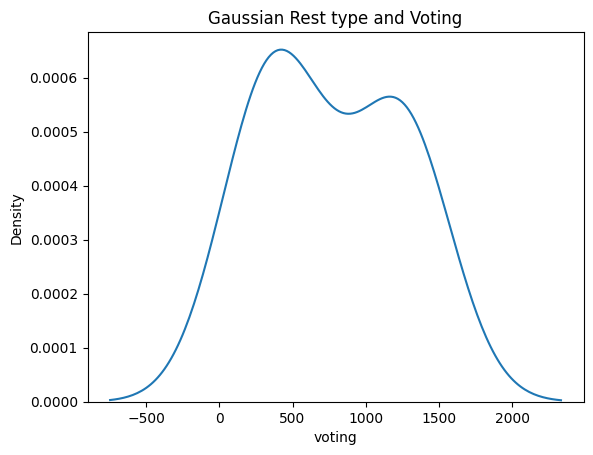

In [70]:
gauss=zomato_df.groupby('type')['voting'].mean().sort_values(ascending = False)[:10]
gauss
sns.kdeplot(gauss)
plt.title('Gaussian Rest type and Voting')

In [71]:
contingency_data = pd.crosstab(zomato_df['type'], zomato_df['booking'],margins = False)
contingency_data

booking,No,Yes
type,,
Buffet,210,445
Cafes,905,231
Delivery,12050,1499
Desserts,1919,115
Dine-out,8838,2074
Drinks & nightlife,288,589
Pubs and bars,207,361


In [72]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=4026.547, p=0.000
dependent categories


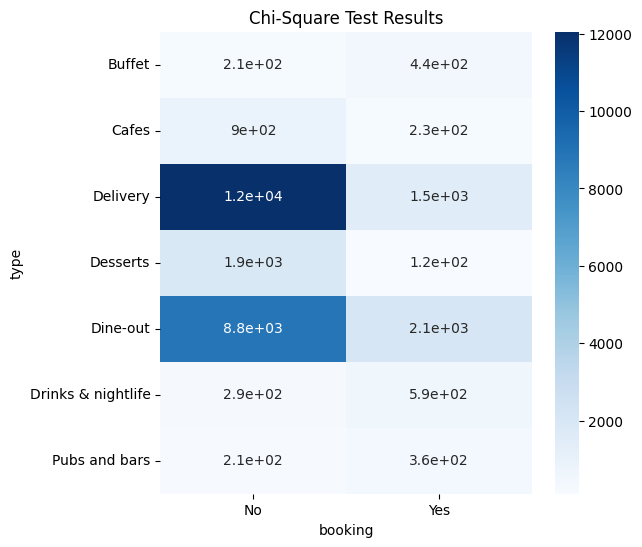

In [73]:
fig = plt.figure(figsize=(6,6))
sns.heatmap(contingency_data, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()


In [74]:
zomato_df

,new_name,isitonline,booking,rating,voting,location,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Continental,1500,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Finger Food,2500,Pubs and bars


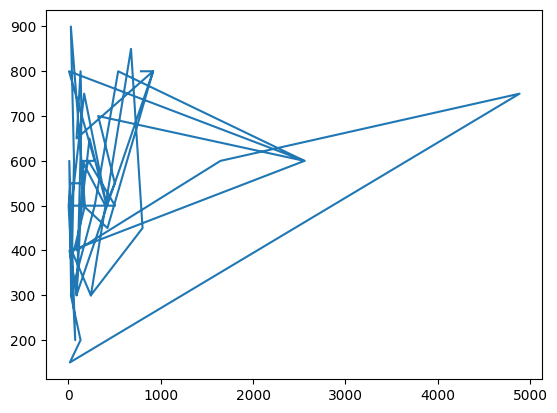

In [75]:
FirstSample = zomato_df[1:50]['voting']
SecondSample = zomato_df[1:50]['cost']

plt.plot(FirstSample,SecondSample)
plt.show()

In [76]:
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.350, p=0.013631
dependent samples
